In [55]:
# Import packages
import pandas as pd
import datetime as dt

import numpy as np
from scipy import optimize

from matplotlib import pyplot as plt

from tqdm import tqdm

In [56]:
# Load data
# Data retrieved from https://github.com/CSSEGISandData/COVID-19
cases = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
deaths = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')

In [57]:
# Delete province and location
cases = cases.drop(columns=['Province/State', 'Lat', 'Long'])
deaths = deaths.drop(columns=['Province/State', 'Lat', 'Long'])
# Group by country
cases = cases.groupby('Country/Region').sum()
deaths = deaths.groupby('Country/Region').sum()
date = [dt.datetime.strptime(ind, '%m/%d/%y').date() for ind in cases.loc["Germany"].index]
date_int = np.array([(d - date[0]).days for d in date])

In [58]:
def plot_country(country, cases, deaths, startday=0, log=True):
    
    #processing
    c = cases.loc[country]
    date = [dt.datetime.strptime(ind, '%m/%d/%y').date() for ind in c.index][startday:]
    date_int = np.array([(d - date[0]).days for d in date])
    cases = np.array(cases.loc[country])[startday:]
    deaths = np.array(deaths.loc[country])[startday:]
    
    diff_cases = cases[1:] - cases[:-1]
    diff_deaths = deaths[1:] - deaths[:-1]

    
    #figure size
    plt.rcParams["figure.figsize"] = (15,7)
    
    n = len(date)
    labels = [date[0], date[n//4], date[n//2], date[3*n//4], date[-1]]
    

    def my_full_plot(x, y, xlabel, ylabel, ind, *args):
        #define plot function depending on log
        if log:
            my_plot = plt.semilogy
        else:
            my_plot = plt.plot
    
    
        plt.subplot(2, 2, ind)
        my_plot(x, y, *args)
        plt.xticks(labels)
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
    
    my_full_plot(date, cases, "Date", "Cases", 1, "orange")

    my_full_plot(date, deaths, "Date", "Deaths", 2, "red")
    
    my_full_plot(date[1:], diff_cases, "Date", "Cases per Day", 3, "orange")
    
    my_full_plot(date[1:], diff_deaths, "Date", "Death per Day", 4, "red")

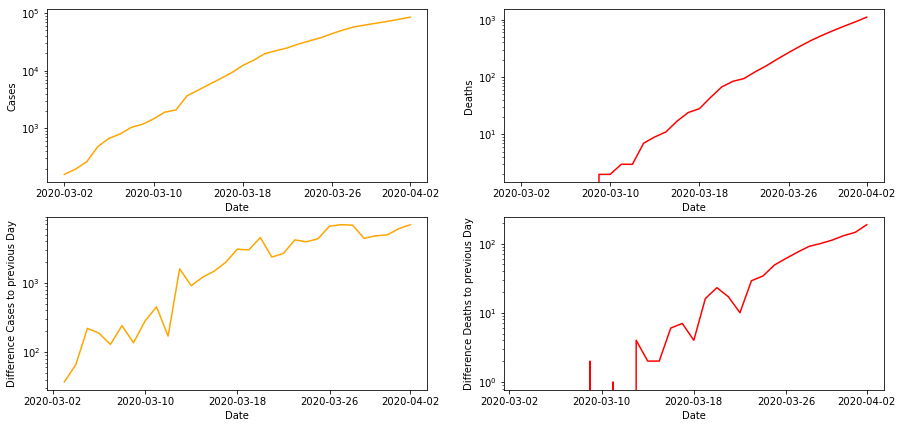

In [54]:
plot_country("Germany", cases, deaths, startday=40, log=True)

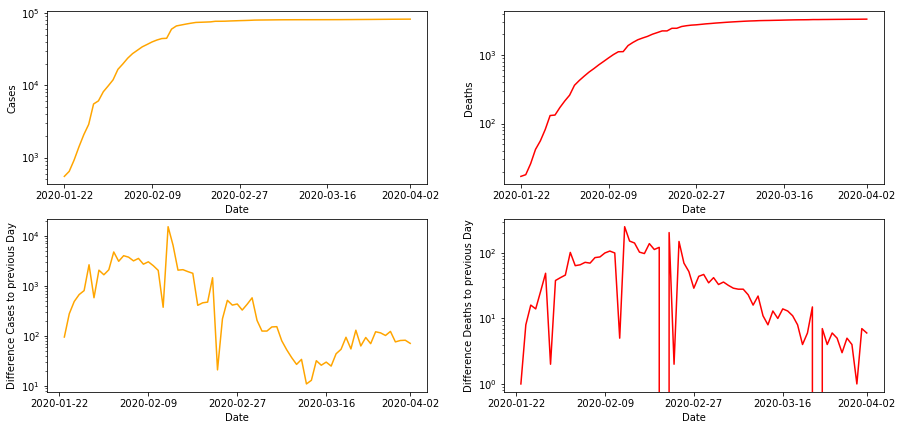

In [61]:
plot_country("China", cases, deaths, startday=0, log=True)

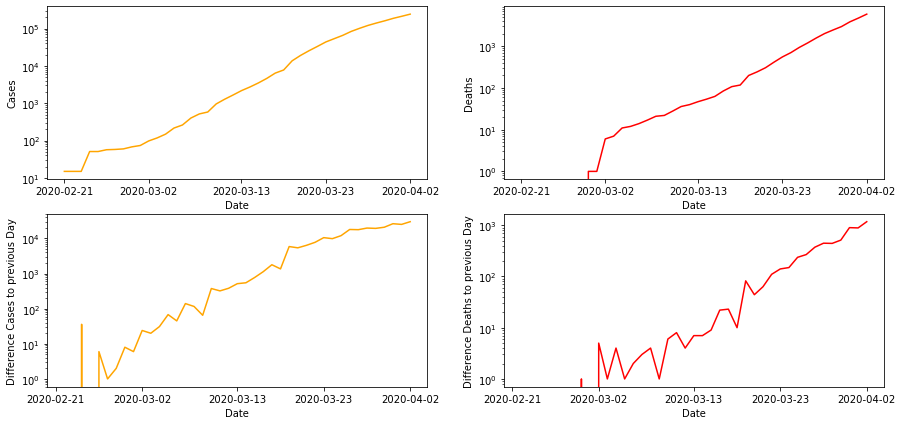

In [53]:
plot_country("US", cases, deaths, startday=30, log=True)